In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from toy_tools import q_gaus, load_fr_ctr

A MIP signal

From https://lar.bnl.gov/properties/

The (dE/dx)MPV for a MIP is 1.6339 MeV/cm.

Given the pitch size is 4.4 mm, the most probable energy loss is 0.44 * 1.64 = 0.719 MeV.

The corresponding number of ion pairs is 0.72MeV/23.6(3) eV/pair = 30_500 pairs.

The fluctuation is then sqrt(0.107 * 30_500) = 57 pairs.


In [23]:
def fr_record(q, pos, unit_fr, npoints=10_000):
    '''
    q: np.ndarray, (N, ), a sequence of charges at z (or t_i = z_i for i in range(N))
    pos: integer, the closet z to anode; closet t to anode
    unit_fr: np.ndarray, (M, ), a sequence of field response for charge at z (or t)

    field response is seen when npoints - position < M
    '''

    fr = np.zeros(npoints)

    r = len(unit_fr)
    n = len(q)
    for j in range(npoints):
        if r > n:
            if pos > npoints - r and pos - n < npoints - r:
                k = pos + r - npoints
                fr[j] = np.sum(q[-k:] * unit_fr[0:k])
            elif pos - n >= npoints - r and pos < npoints:
                l = r - npoints + pos - n
                fr[j] = np.sum(q * unit_fr[l:l+n])
            elif pos >= npoints and pos - n < npoints:
                k = npoints - pos + n
                fr[j] = np.sum(q[:k] * unit_fr[-k:])
        else:
            if pos > npoints - r and pos - n < npoints - r:
                k = pos + r - npoints
                fr[j] = np.sum(q[-k:] * unit_fr[0:k])
            elif pos >= npoints and pos - n < npoints - r:
                l = n - pos + npoints - r
                fr[j] = np.sum(q[l:l+r] * unit_fr)
            elif pos - n >= npoints - r and pos - n < npoints:
                k = npoints - pos + n
                fr[j] = np.sum(q[:k] * unit_fr[-k:])
        pos += 1

    return fr

shape of center region (5, 5, 2000)
integration of first 700 ticks 0.0010430221411030683
drop first 700 ticks and renormalize
[2.77853408e-06 2.78097463e-06 2.78341517e-06 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [21]:
pos = 9_000

(800.0, 1500.0)

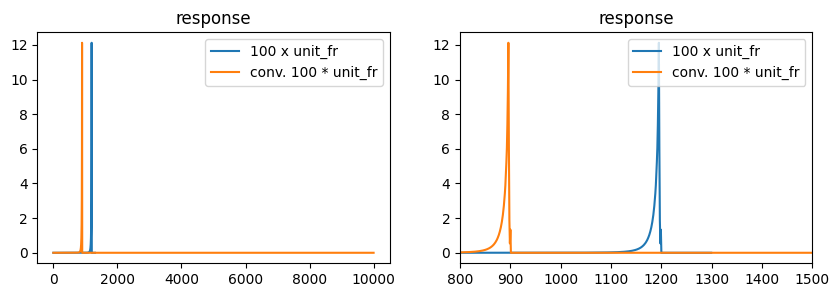

(800.0, 1500.0)

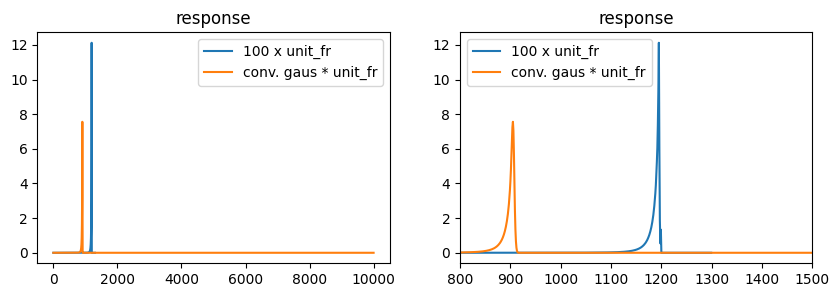

In [43]:
print('sum fr0', np.sum(fr0))
print('sum fr1', np.sum(fr1))

sum fr0 99.89612002555603
sum fr1 99.9002917189318


In [50]:
def run(pos):

    n = 10_000 - pos
    if n < 800:
        xmin = n
    else:
        xmin = 800
    if n > 1300:
        xmax = n
    else:
        xmax = 1300
    
    unit_fr = load_fr_ctr('response_44_v2a_100ns.npy')
    q0 = 100*np.ones(1)
    # from toy_translation.ipynb
    r = 20
    sigma = 2
    q1 = q_gaus(q=100, r=21, sigma=sigma)
    fr0 = fr_record(q0, pos, unit_fr)
    fr1 = fr_record(q1, pos, unit_fr)

    # q0
    fig, (ax0, ax1) = plt.subplots(1,2, figsize=(5*2, 3))
    ax0.plot(q0*unit_fr, label='100 x unit_fr')
    ax0.plot(fr0, label='conv. 100 * unit_fr')
    ax0.legend()
    ax0.set_title('response')

    ax1.plot(q0*unit_fr, label='100 x unit_fr')
    ax1.plot(fr0, label='conv. 100 * unit_fr')
    ax1.legend()
    ax1.set_title('response')
    ax1.set_xlim(xmin, xmax)

    # q1
    fig, (ax0, ax1) = plt.subplots(1,2, figsize=(5*2, 3))

    ax0.plot(100*unit_fr, label='100 x unit_fr')
    ax0.plot(fr1, label='conv. gaus * unit_fr')
    ax0.legend()
    ax0.set_title('response')

    ax1.plot(q0*unit_fr, label='100 x unit_fr')
    ax1.plot(fr1, label='conv. gaus * unit_fr')
    ax1.legend()
    ax1.set_title('response')
    ax1.set_xlim(xmin, xmax)

    print('sum fr0', np.sum(fr0))
    print('sum fr1', np.sum(fr1))

shape of center region (5, 5, 2000)
integration of first 700 ticks 0.0010430221411030683
drop first 700 ticks and renormalize
sum fr0 99.89612002555603
sum fr1 99.9002917189318


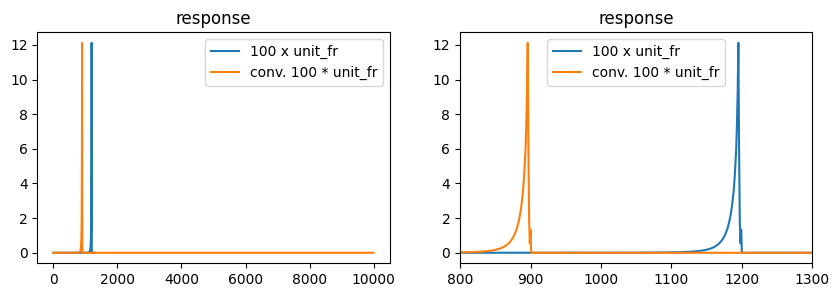

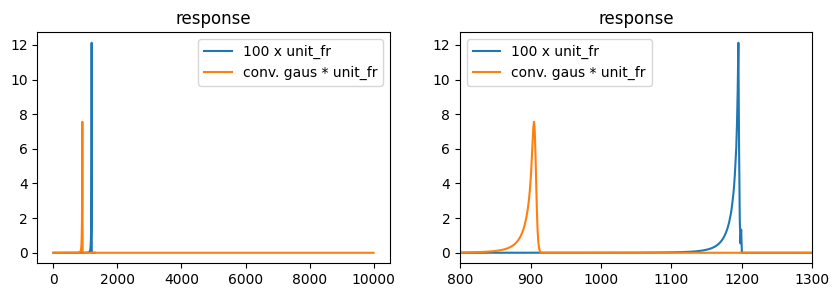

In [51]:
run(9000)

shape of center region (5, 5, 2000)
integration of first 700 ticks 0.0010430221411030683
drop first 700 ticks and renormalize
sum fr0 99.97030601369369
sum fr1 99.97350748049206


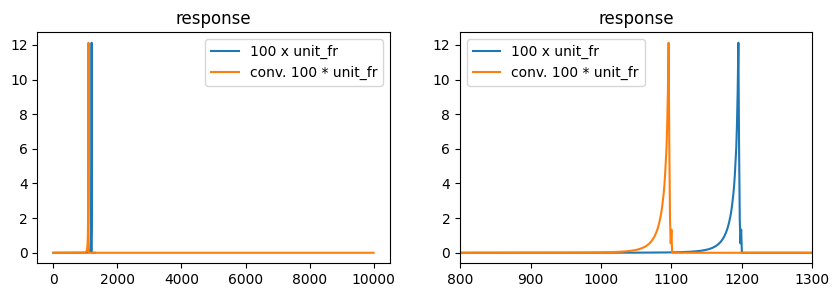

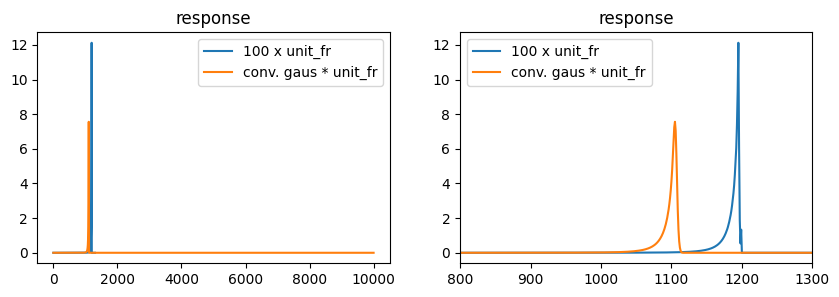

In [54]:
run(8800)